# Define Problem

A manufacturing company is facing challenge to classify raw materials(products) received from vendors. To help them in classifying the raw materials, build a machine learning model that could predict the category based on certain input features. 


In [266]:
# GUESS THE PRODUCT

# Import Libraries

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import langdetect
import nltk
import re
import spacy
import collections
lst_stopwords = nltk.corpus.stopwords.words("english")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [268]:
df = pd.read_csv(r'train_set.csv')                                             #read training dataset 

In [269]:
df1 = pd.read_csv(r'test_set.csv')                                             #read testing dataset 

In [270]:
#for prediction
test_data = df1['Inv_Id'] 

# Exploratory Data Analysis(EDA)

In [271]:
df.head(5)                              #To check 1st five record

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inv_Id            5288 non-null   int64  
 1   Vendor_Code       5288 non-null   object 
 2   GL_Code           5288 non-null   object 
 3   Inv_Amt           5288 non-null   float64
 4   Item_Description  5288 non-null   object 
 5   Product_Category  5288 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 248.0+ KB


Traning dataset have total 5288 records.

from this all 4 feature is object, 1 is int and 1 is float  

In [273]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inv_Id            278 non-null    int64  
 1   Vendor_Code       278 non-null    object 
 2   GL_Code           278 non-null    object 
 3   Inv_Amt           278 non-null    float64
 4   Item_Description  278 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.0+ KB


Testing Data Have the 278 Records. 

From this all 3 feature is Object, 1 is int and 1 is float

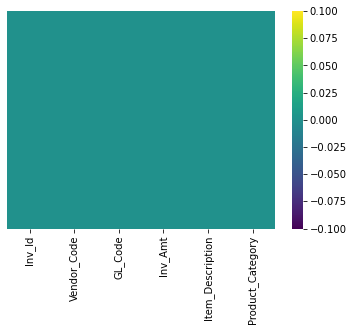

In [274]:
sns.heatmap(df.isnull(),yticklabels = False, cmap = 'viridis')

Our Training Dataset Does not Have any Null Value

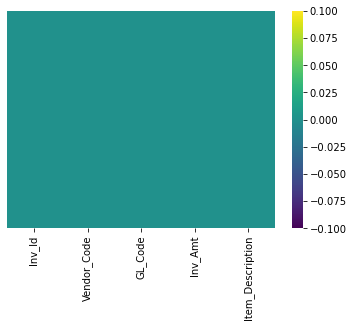

In [275]:
sns.heatmap(df1.isnull(),yticklabels = False, cmap = 'viridis')

Our Testing Dataset also does not have any null Value

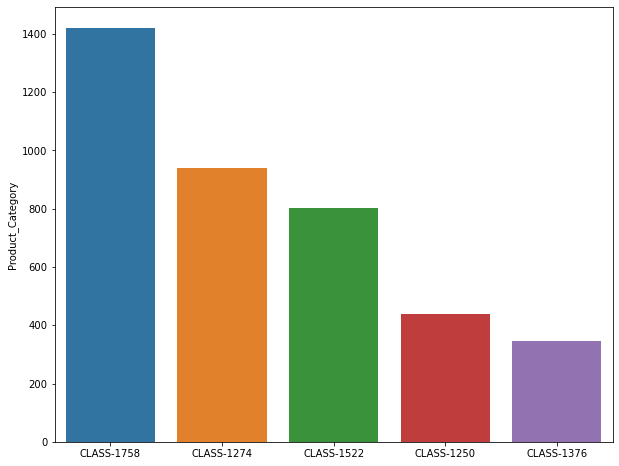

In [276]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Product_Category'].value_counts().head(5).index, y=df['Product_Category'].value_counts().head(5))
plt.show()

CLASS-1758 product has highest count in Product_Category Column

In [277]:
#To find count of Unique Record from all column 
uniqueValues = df.nunique(dropna=False)
uniqueValues

Inv_Id              5288
Vendor_Code         1206
GL_Code                9
Inv_Amt             4099
Item_Description    5281
Product_Category      36
dtype: int64

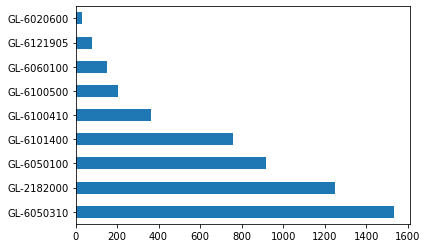

In [278]:
df.GL_Code.value_counts().plot(kind = 'barh')

# Data Pre-processing

In Our Dataset Some Feature Come with Text Data, So we need to Remove all Text.  

In [279]:
df['Vendor_Code'] = df['Vendor_Code'].str[7:]
#To change the Dtype (object to Int) 
df['Vendor_Code'] = df['Vendor_Code'].astype(str).astype(int)
df['GL_Code'] = df['GL_Code'].str[3:]
df['GL_Code'].head()
#To change the Dtype (object to Int) 
df['GL_Code'] = df['GL_Code'].astype(str).astype(int)

In [280]:
#df['Product_Category'] = df['Product_Category'].str[6:]
#df['Product_Category'] = df['Product_Category'].astype(str).astype(int)

In [281]:
#Same Process with test Data 
df1['Vendor_Code'] = df1['Vendor_Code'].str[7:]
#To change the Dtype (object to Int) 
df1['Vendor_Code'] = df1['Vendor_Code'].astype(str).astype(int)
#Same Process with Gl_Code
df1['GL_Code'] = df1['GL_Code'].str[3:]
df1['GL_Code'].head()
#To change the Dtype (object to Int) 
df1['GL_Code'] = df1['GL_Code'].astype(str).astype(int)

c:\users\shubham\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


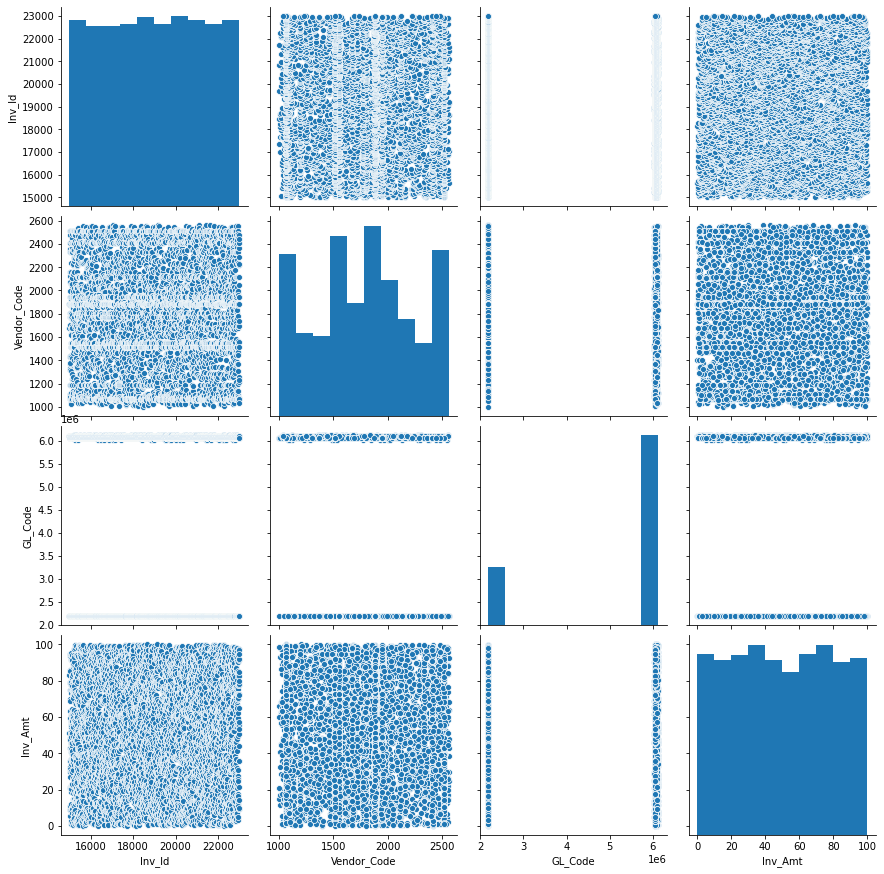

In [282]:
sns.pairplot(df, size = 3)

we can observe df is an not-Symmetric, so lets find out the correlation matrix to look into details.

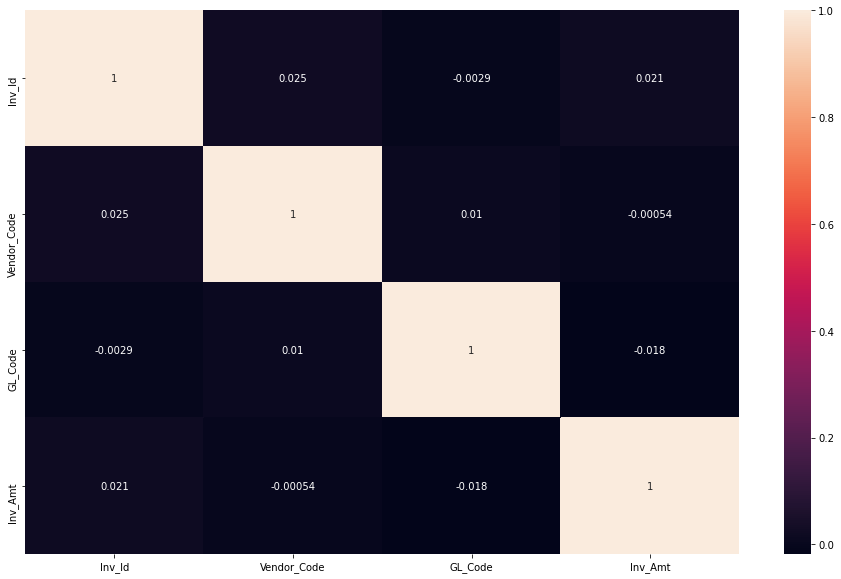

In [283]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True)

In our Dataset All the Columns are Linear, To build a model, we need to focus on Categorical Column. 

# Text Preprocessing by using NLP that includes: 

# 1)Tokenization 

In [284]:
txt = df["Item_Description"].iloc[0]
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
txt = txt.split()
print(txt)

['artworkingtypesetting', 'production', 'jun', '2009', 'champion', 'parts', 'inc', 'smap', 'prototype', 'and', 'comp', 'productionpackaging', 'design']


# 2)Remove Stopwords

In [285]:
txt = [word for word in txt if word not in lst_stopwords]
print(txt)

['artworkingtypesetting', 'production', 'jun', '2009', 'champion', 'parts', 'inc', 'smap', 'prototype', 'comp', 'productionpackaging', 'design']


# 3)Stemming

In [286]:
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])


['artworkingtypeset', 'product', 'jun', '2009', 'champion', 'part', 'inc', 'smap', 'prototyp', 'comp', 'productionpackag', 'design']


# 4)Lemmentization


In [287]:
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

['artworkingtypesetting', 'production', 'jun', '2009', 'champion', 'part', 'inc', 'smap', 'prototype', 'comp', 'productionpackaging', 'design']


In [288]:
def utils_preprocess_text(text, flg_stemm=True, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [289]:
df = df.rename(columns={"Item_Description":"text"})
df1 = df1.rename(columns={"Item_Description":"text"})

In [290]:
#Add Clean Text to our Training and Testing Dataset 
df["text_clean"] = df["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True))
df1["text_clean"] = df1["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True))

In [291]:
#To get more feature from previous record

In [292]:
#Word Count
#Character Count
#Sentence Count
#Average Word Count 
#Average Sentence Length

In [293]:
df['word_count'] = df["text_clean"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["text_clean"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["text_clean"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,text,Product_Category,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,15001,1676,6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,artworkingtypesetting production jun 2009 cham...,13,98,1,7.538462,13.0
1,15002,1883,2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,auto leasing corporate service corning inc ny ...,15,92,1,6.133333,15.0
2,15004,1999,6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,store management leaserent deltona corp real e...,10,60,1,6.000000,10.0
3,15005,1771,6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,store construction general requirement colonia...,14,91,1,6.500000,14.0
4,15006,1331,2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,jul 2015 aydin corp contingent labortemp labor...,14,93,1,6.642857,14.0


In [294]:
df1['word_count'] = df1["text_clean"].apply(lambda x: len(str(x).split(" ")))
df1['char_count'] = df1["text_clean"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df1['sentence_count'] = df1["text_clean"].apply(lambda x: len(str(x).split(".")))
df1['avg_word_length'] = df1['char_count'] / df1['word_count']
df1['avg_sentence_lenght'] = df1['word_count'] / df1['sentence_count']
df1.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,text,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,15041,1181,6050100,88.80,Base Rent Store Management Aig Equity Sales Co...,base rent store management aig equity sale cor...,12,66,1,5.500000,12.0
1,15094,1554,6100410,80.08,Prototype and Comp Production/Packaging Design...,prototype and comp productionpackaging design ...,12,97,1,8.083333,12.0
2,15112,1513,6050310,24.23,Ground Transportation Travel and Entertainment...,ground transportation travel and entertainment...,20,134,1,6.700000,20.0
3,15179,1044,6101400,38.85,Store Construction General Requirements Advanc...,store construction general requirement advance...,15,97,1,6.466667,15.0
4,15212,1114,6050310,94.15,Travel and Entertainment Miscellaneous Company...,travel and entertainment miscellaneous company...,20,130,1,6.500000,20.0


# NER(Name Entity Recognition )

In [295]:
#To identify the key elements in a text
## call model
ner = spacy.load("en_core_web_sm")
## tag text
txt = df1["text_clean"].iloc[0]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

In [296]:
#To apply NER To train and Test Dataset 
df['tags'] = df['text_clean'].apply(lambda x : [(tag.text, tag.label_)
                                         for tag in ner(x).ents])
df1['tags'] = df1['text_clean'].apply(lambda x : [(tag.text, tag.label_)
                                         for tag in ner(x).ents])

In [297]:
#function to count element in a list

def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count


In [298]:
df["tags"] = df["tags"].apply(lambda x: utils_lst_count(x))
df1["tags"] = df1["tags"].apply(lambda x: utils_lst_count(x))

In [299]:
## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

In [300]:
#get features 
tags_set = []
for lst in df["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     df["tags_"+feature] = df["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))


In [301]:
# The element Categories of Train Dataset
tags_set

['ORG',
 'PERSON',
 'CARDINAL',
 'FAC',
 'DATE',
 'EVENT',
 'PERCENT',
 'LAW',
 'MONEY',
 'LOC',
 'NORP',
 'WORK_OF_ART',
 'ORDINAL',
 'GPE',
 'PRODUCT',
 'QUANTITY',
 'TIME']

In [302]:
#get features 
tags_set1 = []
for lst in df1["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set1.append(k[1])
tags_set1 = list(set(tags_set))
for feature in tags_set1:
     df1["tags_"+feature] = df1["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))


In [303]:
#Element Categories of TEST Dataset
tags_set1

['ORG',
 'PERSON',
 'CARDINAL',
 'FAC',
 'DATE',
 'EVENT',
 'PERCENT',
 'LAW',
 'MONEY',
 'LOC',
 'NORP',
 'WORK_OF_ART',
 'ORDINAL',
 'GPE',
 'PRODUCT',
 'QUANTITY',
 'TIME']

In [304]:
df = df.rename(columns={"text_clean": "Item_Description"})
df1 = df1.rename(columns={"text_clean": "Item_Description"})

# Tri-gram

In [305]:
a = []
b = []
c = []
d = []
e = []
count = 0
for i in df['Item_Description']:
    z =  ' '.join(i.split()[:3])
    a.append(z)
    z1 = ' '.join(i.split()[3:6])
    b.append(z1)
    z2 = ' '.join(i.split()[6:9])
    c.append(z2)
    z3 = ' '.join(i.split()[9:12])
    d.append(z3)
    z4 = ' '.join(i.split()[12:15])
    e.append(z4)
df['Level_1'] = a
df['Level_2'] = b
df['Level_3'] = c
df['Level_4'] = d
df['Level_5'] = e

In [306]:
a = []
b = []
c = []
d = []
e = []
count = 0
for i in df1['Item_Description']:
    z =  ' '.join(i.split()[:3])
    a.append(z)
    z1 = ' '.join(i.split()[3:6])
    b.append(z1)
    z2 = ' '.join(i.split()[6:9])
    c.append(z2)
    z3 = ' '.join(i.split()[9:12])
    d.append(z3)
    z4 = ' '.join(i.split()[12:15])
    e.append(z4)
df1['Level_1'] = a
df1['Level_2'] = b
df1['Level_3'] = c
df1['Level_4'] = d
df1['Level_5'] = e

# Feature Encoding

In [307]:
# Create an object of the label encoder class
labelencoder = LabelEncoder()

In [308]:
df['Item_Description'] = labelencoder.fit_transform(df['Item_Description'])
df1['Item_Description'] = labelencoder.fit_transform(df1['Item_Description'])


In [309]:
df['Level_1'] = labelencoder.fit_transform(df['Level_1'])
df['Level_2'] = labelencoder.fit_transform(df['Level_2'])
df['Level_3'] = labelencoder.fit_transform(df['Level_3'])
df['Level_4'] = labelencoder.fit_transform(df['Level_4'])
df['Level_5'] = labelencoder.fit_transform(df['Level_5'])
df1['Level_1'] = labelencoder.fit_transform(df1['Level_1'])
df1['Level_2'] = labelencoder.fit_transform(df1['Level_2'])
df1['Level_3'] = labelencoder.fit_transform(df1['Level_3'])
df1['Level_4'] = labelencoder.fit_transform(df1['Level_4'])
df1['Level_5'] = labelencoder.fit_transform(df1['Level_5'])

 Remove Unnesasary Columns(Less Correlated)

In [310]:
X = df.drop(['Inv_Id','Vendor_Code','Product_Category','tags','text'], axis = 1)

In [311]:
df1 = df1.drop(['Inv_Id','Vendor_Code','tags','text'], axis = 1)

# Cross Validation 

In [312]:
#X = df[['Vendor_Code','GL_Code','Item_Description','Level_1','Level_2','Level_3','Level_4','Level_5']]
y = df['Product_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4230, 30)
(1058, 30)
(4230,)
(1058,)


In [313]:
X_train.head(2)                         # All training Data Converted into Int

,GL_Code,Inv_Amt,Item_Description,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,tags_ORG,tags_PERSON,...,tags_ORDINAL,tags_GPE,tags_PRODUCT,tags_QUANTITY,tags_TIME,Level_1,Level_2,Level_3,Level_4,Level_5
4617,6050310,14.48,5105,19,130,1,6.842105,19.0,1,0,...,0,0,0,0,0,1351,1385,885,1694,320
5127,6101400,22.39,308,13,87,1,6.692308,13.0,1,0,...,0,0,0,0,0,255,1732,592,762,897


Dealing with Imbalanceness of Dataset by using MinMax Scaling 

In [314]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection 

# Support Vector Classifier

In [315]:
from sklearn.metrics import f1_score
parameters = {'kernel':('linear', 'rbf'), 'C':[1,10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)
svc_pred = clf.predict(X_test)
acc_svc = round(accuracy_score(svc_pred, y_test) * 100, 2)
print(acc_svc)


c:\users\shubham\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


87.81


In [316]:
#Prediction on training Dataset
svc_pred[:10]

array(['CLASS-1250', 'CLASS-1522', 'CLASS-2003', 'CLASS-1758',
       'CLASS-1250', 'CLASS-1274', 'CLASS-1522', 'CLASS-1274',
       'CLASS-1250', 'CLASS-1522'], dtype=object)

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.


In [317]:
svc_f1 = f1_score(y_test, svc_pred, average='weighted')
svc_f1

0.856412922968302

In [318]:
#Scaling of Test Data
df1 = scaler.transform(df1)

In [319]:
#Prediction on Testing Data 
predictions_svc = clf.predict(df1)
predictions_svc[:10]

array(['CLASS-1274', 'CLASS-1963', 'CLASS-1758', 'CLASS-1963',
       'CLASS-1758', 'CLASS-1429', 'CLASS-1250', 'CLASS-1274',
       'CLASS-1274', 'CLASS-1963'], dtype=object)

# GridsearchCV 

In [320]:
param_grid ={'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


c:\users\shubham\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.743, total=   2.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.751, total=   2.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.760, total=   2.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.735, total=   2.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.768, total=   2.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.651, total=   2.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.652, total=   2.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.657, total=   2.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.648, total=   2.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ...................... C=100, gamma=1, score=0.857, total=   1.5s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.877, total=   1.5s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.891, total=   2.6s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.849, total=   1.9s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.890, total=   1.7s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.872, total=   1.2s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.883, total=   1.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.4min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [321]:
grid_pred = grid.predict(X_test)
acc_grid = round(accuracy_score(grid_pred, y_test) * 100, 2)
print(acc_grid)
grid_f1 = f1_score(y_test, grid_pred, average='weighted')
print(grid_f1)

88.56
0.8669478861052616


In [324]:
predictions_grid = grid.predict(df1)
predictions_grid[:10]

array(['CLASS-1274', 'CLASS-1963', 'CLASS-1758', 'CLASS-1721',
       'CLASS-1758', 'CLASS-1429', 'CLASS-1250', 'CLASS-1274',
       'CLASS-1274', 'CLASS-1721'], dtype=object)

# Naive Based 

In [325]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_nb = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_nb)

39.79


In [326]:
nb_f1 = f1_score(y_test, y_pred, average='weighted')
nb_f1

0.4133430465305007

# Random Forest

In [327]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)
randomforest_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(randomforest_pred,y_test) *100,2)
print(acc_randomforest)

96.12


In [328]:
randomforest_f1 = f1_score(y_test, randomforest_pred, average='weighted')
randomforest_f1

0.9555474473186876

In [329]:
predictions_rf = randomforest.predict(df1)        #Prediction on Test Data
predictions_rf[:10]

array(['CLASS-1274', 'CLASS-1963', 'CLASS-1758', 'CLASS-1522',
       'CLASS-1758', 'CLASS-1274', 'CLASS-1250', 'CLASS-1274',
       'CLASS-1522', 'CLASS-1522'], dtype=object)

# KNN


In [330]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(knn_pred,y_test) *100,2)
print(acc_knn)


78.73


In [331]:
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
knn_f1

0.7406167111084019

In [332]:
#Prediction on Training Data 
knn_pred[:10]

array(['CLASS-1250', 'CLASS-1522', 'CLASS-1250', 'CLASS-1758',
       'CLASS-1250', 'CLASS-1274', 'CLASS-1522', 'CLASS-1274',
       'CLASS-1250', 'CLASS-1522'], dtype=object)

In [333]:
#Let's go ahead and use the elbow method to pick a good K Value!
#Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error Rate')

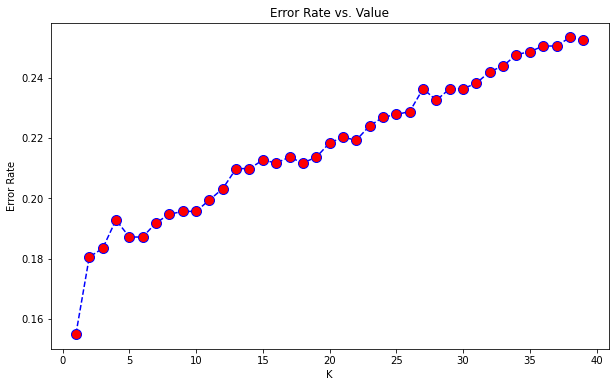

In [334]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

When Model Increase the value of K, The error is increase.


#Retrain Our Model



In [335]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(X_train,y_train)
y_pred1 = knn1.predict(X_test)
acc_knn1 = round(accuracy_score(y_pred1,y_test) *100,2)
print(acc_knn1)


81.95


In [336]:
knn1_f1 = f1_score(y_test, y_pred1, average='weighted')
knn1_f1

0.7958495862084506

In [337]:
#Prediction on Testing Data 
predictions_knn1 = knn1.predict(df1)
predictions_knn1[:10]

array(['CLASS-1274', 'CLASS-1963', 'CLASS-1522', 'CLASS-1522',
       'CLASS-1522', 'CLASS-1274', 'CLASS-1250', 'CLASS-1274',
       'CLASS-1963', 'CLASS-1828'], dtype=object)

# Model Evaluation 


In [343]:
models = pd.DataFrame({'Model' :['SVC','KNN(1)','Naive-Based','GridSearchCV','Random_Forest','KNN(2)'],
                       'Score' :[acc_svc, acc_knn, acc_nb, acc_grid, acc_randomforest,acc_knn1],
                      'F1-Score':[svc_f1, knn_f1, nb_f1, grid_f1, randomforest_f1, knn1_f1]})
#models.sort_values(by = 'F1-Score',ascending=True)
models

,Model,Score,F1-Score
0,SVC,87.81,0.856413
1,KNN(1),78.73,0.740617
2,Naive-Based,39.79,0.413343
3,GridSearchCV,88.56,0.866948
4,Random_Forest,96.12,0.955547
5,KNN(2),81.95,0.795850


Random Forest is Overfit the dataset 

Naive-Based is Cannot Capture Pattern of Dataset

KNN1 and KNN2 follow the same pattern on prediction dataset. 

SO, We go with Grid-Search cv. 

In [345]:
#now its time to choose the model prediction submission.

# create submission File

In [346]:
# Add to submission
submission = pd.DataFrame({
        "Inv_id": test_data,
        "Product_Category": predictions_grid
})

submission.to_csv('Result.csv',index=False)
